In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import re 

In [2]:
orginal_data=pd.read_csv(r'..\Data analysis 1\movieReplicationSet.csv')
orginal_data

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


## Question 1 
are movies that are more popular (operationalized as having more ratings) rated higher than movies that
are less popular? [Hint: You can do a median-split of popularity to determine high vs. low popularity movies]

- first goal is to break the data into populor versus unpopulor movies. 

In [3]:
movie_data=orginal_data.copy().iloc[:,0:400] ## just taking the movies
populor_threshold=int(np.median(movie_data.isna().sum()))#+1 ## finding the medina number of ratings for the movies. keep in mind this is the number of missing data
unpopulor_movies=movie_data.copy().iloc[:,np.where(movie_data.isna().sum()>=populor_threshold)[0]] ## so movies with more than the median missing data are unpopulor
poplor_movies=movie_data.copy().iloc[:,np.where(movie_data.isna().sum()<populor_threshold)[0]] ## movies with less than the medina missing data are populor
unpopulor_movies=unpopulor_movies.values.flatten() ## flatten that is put in a 1d array 
poplor_movies=poplor_movies.values.flatten()
unpopulor_movies=unpopulor_movies[~np.isnan(unpopulor_movies)] ## then ellementwise drop na. this is fine since we are just looking at reviews. 
poplor_movies=poplor_movies[~np.isnan(poplor_movies)] ## the man whiteny u test also does nto care if arrays have equal lenght. 





# D (what did you do )
I made the following choices or assumptions
- Broke the data into two groups, those with more ratings than the median, and those with fewer than the median number of ratings. 
- flattend the each group into a 1-dimensional array of movie ratings. 
- ellement-wise dropped the missing values from each array. 
- ran a two-sided man whiteny U test on our groups.
# Y (why did you do this)
my reasons for doing the above in order were. 
- this was a natural way to break the data into two groups as sugested by the prompt. 
- this allowed for the two groups each containing many movies to be analyzed as two arrays. 
- Few if any indivudals were likely to have seen every movie, and further it is reasnable to assume that the lack of seing some other movie would not reduce an indivudals ability to rate some movie. 
-   

## preparing for analysis
- our next question is how to prepare the data for analysis
- the first qeusition is how to deal with null vales
## removing null values 
- in this case there are so many movies and few if any people are likely to have seen them all, so we should aim to remove data ellementwise
## chosing a test statistiic. 
- we know that ratings data are ordinal so the mean is not meaningfull
- in this case we might instead be intrested in comparing the medians of each group with the mann whiten u test
## preparing data for this
- so we are going to take the medina of each populor and unpopulor movie after ellementwisee removing the missing values
- then put them in a data frame 


## man whiteney u test 
- our null hypothsis is the median rating of populor movies==the medina rating of unpopulor movies
- the question is asking, "are more popular rated higher than movies that are less popular?" thus we want to do a 1 tailed test with alternative hypothsis  median rating of populor movies>the medina rating of unpopulor movies

 we get a p value of 0.0 which is less than our alpha value of  0.005 meaning that we reject the null hypothsis


Text(0, 0.5, 'movie rating')

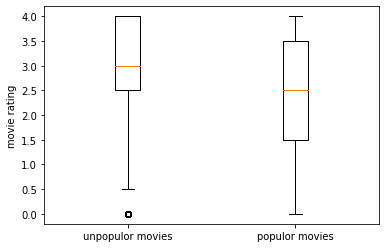

In [4]:
u,p = stats.mannwhitneyu(poplor_movies,unpopulor_movies,alternative="greater")
print(" we get a p value of",p, "which is less than our alpha value of  0.005 meaning that we reject the null hypothsis", )


plt.boxplot((poplor_movies,unpopulor_movies), labels=["unpopulor movies", "populor movies"])
plt.ylabel("movie rating")

## question 2
Are movies that are newer rated differently than movies that are older? [Hint: Do a median split of year of
release to contrast movies in terms of whether they are old or new. 

- here much of our apraoch to question one still holds, but we are going to conduct a two tailed instead of one tailed test.

In [5]:
orginal_data
movie_data=orginal_data.copy().iloc[:,0:400] ## just taking the movies
test_string=movie_data.columns[0]
rellease_years=[]
for movie in movie_data.columns:
    rellease_years.append(int(re.findall(r'\(\d+\)',movie)[0][1:5]))
rellease_years=np.array(rellease_years)
release_year_threshold=np.median(rellease_years)
old_movies=movie_data.iloc[:,np.where(rellease_years<release_year_threshold)[0]]
new_movies=movie_data.iloc[:,np.where(rellease_years>=release_year_threshold)[0]]
old_movies=old_movies.values.flatten() ## flatten that is put in a 1d array 
new_movies=new_movies.values.flatten()
old_movies=old_movies[~np.isnan(old_movies)] ## then ellementwise drop na. this is fine since we are just looking at reviews. 
new_movies=new_movies[~np.isnan(new_movies)] ## the man whiteny u test also does nto care if arrays have equal lenght. 


 we get a p value of 1.2849216001533932e-06 which is less half of alpha value of  0.005/2 meaning that reject the null hypothsis


Text(0, 0.5, 'movie rating')

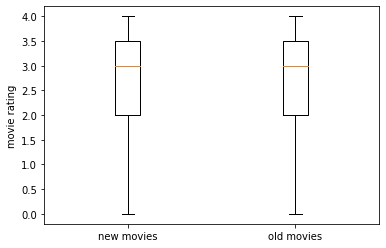

In [6]:
u,p = stats.mannwhitneyu(new_movies,old_movies,alternative="two-sided")
print(" we get a p value of",p, "which is less half of alpha value of  0.005/2 meaning that reject the null hypothsis", )


plt.boxplot((new_movies,old_movies), labels=["new movies", "old movies"])
plt.ylabel("movie rating")

## question 3. Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?



In [7]:
a=orginal_data[["Shrek (2001)","Gender identity (1 = female; 2 = male; 3 = self-described)"]]
b=orginal_data[orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==1]
c=b[np.isnan(b["Shrek (2001)"])==False]
len(c) # 743
#len(female_shreck_watchers) #743
#c[["Shrek (2001)","Gender identity (1 = female; 2 = male; 3 = self-described)"]].value_counts

#sgould have lenght of orignal -6
#len(male_shreck_watchers)+len(female_shreck_watchers) ## missing 30 entereis. 
#len(a) ##1097
# male_shreck_watchers.value_counts()
# female_shreck_watchers.value_counts()

743

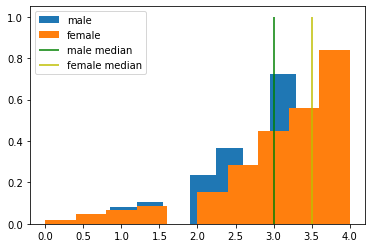

In [8]:
from cv2 import normalize


a_0=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==2
a_1=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==1
b=~np.isnan(orginal_data['Shrek (2001)'])
male_shreck_watchers=orginal_data[a_0 & b][['Shrek (2001)',"Gender identity (1 = female; 2 = male; 3 = self-described)" ]]
female_shreck_watchers=orginal_data[a_1 & b][['Shrek (2001)',"Gender identity (1 = female; 2 = male; 3 = self-described)" ]]
plt.hist(male_shreck_watchers["Shrek (2001)"],label="male", density=True)
plt.hist(female_shreck_watchers["Shrek (2001)"], label="female",density=True)
plt.vlines(np.median(male_shreck_watchers["Shrek (2001)"]),ymin=0, ymax=1, label="male median", color="g")
plt.vlines(np.median(female_shreck_watchers["Shrek (2001)"]),ymin=0, ymax=1, label="female median", color='y')
plt.legend()

In [9]:
females=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==2
a_1=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==1
a_2=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==3
78/np.sum(len(a_0))*100
241/np.sum(a_1)*100
#print(len(a_1))
#print(len(a_0))
#np.sum(a_1) ## 807 females
#np.sum(a_0) ## 260 dudes

29.8636926889715

{'whiskers': [<matplotlib.lines.Line2D at 0x25e52680820>,
 'caps': [<matplotlib.lines.Line2D at 0x25e52680f40>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e52680490>,
 'medians': [<matplotlib.lines.Line2D at 0x25e5268b6a0>,
 'fliers': [<matplotlib.lines.Line2D at 0x25e5268ba30>,
 'means': []}

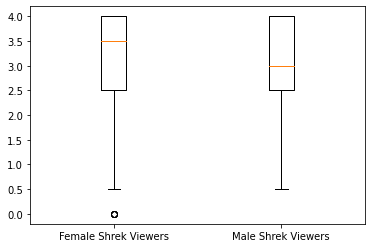

In [10]:
male_shreck_watchers=orginal_data[a_0 & b][['Shrek (2001)',"Gender identity (1 = female; 2 = male; 3 = self-described)" ]]['Shrek (2001)']
female_shreck_watchers=orginal_data[a_1 & b][['Shrek (2001)',"Gender identity (1 = female; 2 = male; 3 = self-described)" ]]['Shrek (2001)']
female_shreck_watchers
u,p = stats.mannwhitneyu(female_shreck_watchers,male_shreck_watchers,alternative="two-sided")
# print(p,p<0.005/2)
# print(" we get a p value of",p, "which is less half of alpha value of  0.005/2 meaning that reject the null hypothsis", )
plt.boxplot((female_shreck_watchers,male_shreck_watchers), labels=["Female Shrek Viewers", "Male Shrek Viewers"])
# plt.ylabel("movie rating")

#len(female_shreck_watchers)
#len(male_shrck_watchers)
#orginal_data[feature_1==1]



4) What proportion of movies are rated differently by male and female viewers?

## i mean here we can just run the what we did above on all movies and count the proportions.

In [11]:
from cv2 import normalize
p_vals=[]
for moive in orginal_data.columns[:400]:
    a_0=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==2
    a_1=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==1
    a_1=orginal_data["Gender identity (1 = female; 2 = male; 3 = self-described)"]==3
    b=~np.isnan(orginal_data[moive])
    male_shreck_watchers=np.sort(orginal_data[a_0 & b][moive])
    female_shreck_watchers=np.sort(orginal_data[a_1 & b][moive])
    p_vals.append(stats.mannwhitneyu(female_shreck_watchers,male_shreck_watchers,alternative="two-sided").pvalue)


c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packages\scipy\stats\stats.py:7171: RuntimeWarning: divide by zero encountered in double_scalars
  z = (bigu - meanrank) / sd
c:\Users\buzga\anaconda3\lib\site-packag

In [12]:
p_vals=np.array(p_vals)
np.sum(p_vals<(0.005/2))/400


0.3375

Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

151
776
177
894
26


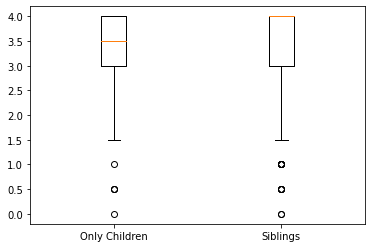

In [13]:
feature_1="Are you an only child? (1: Yes; 0: No; -1: Did not respond)"
movie='The Lion King (1994)'
a_0=orginal_data[feature_1]==1
a_1=orginal_data[feature_1]==0
a_2=orginal_data[feature_1]==-1
b=~np.isnan(orginal_data[movie])
only_children=np.sort(orginal_data[a_0 & b][movie])
has_sibs=np.sort(orginal_data[a_1 & b][movie])
stats.mannwhitneyu(only_children,has_sibs,alternative="greater")


## check this one. 
plt.boxplot((only_children,has_sibs), labels=["Only Children", "Siblings"])
print(len(only_children))
print(len(has_sibs))

print(np.sum(a_0))
print(np.sum(a_1))
print(np.sum(a_2))

What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings
vs. those without?

In [14]:
feature_1="Are you an only child? (1: Yes; 0: No; -1: Did not respond)"
a_0=orginal_data[feature_1]==1
a_1=orginal_data[feature_1]==0
p_vals=[]
for moive in orginal_data.columns[:400]:
    print(moive)
    b=~np.isnan(orginal_data[moive])
    only_children=np.sort(orginal_data[a_0 & b][moive])
    has_sibs=np.sort(orginal_data[a_1 & b][moive])
    p_vals.append(stats.mannwhitneyu(only_children,has_sibs,alternative="two-sided").pvalue)
    print(stats.mannwhitneyu(only_children,has_sibs,alternative="two-sided").pvalue)


The Life of David Gale (2003)
0.8410669691065599
Wing Commander (1999)
0.8133639930027994
Django Unchained (2012)
0.0435271281226858
Alien (1979)
0.18103864741374043
Indiana Jones and the Last Crusade (1989)
0.9451644503827471
Snatch (2000)
0.050574800611620875
Rambo: First Blood Part II (1985)
0.06274844847876453
Fargo (1996)
0.4161226546607606
Let the Right One In (2008)
0.2633880600800549
Black Swan (2010)
0.769848412560912
King Kong (1976)
0.3410705360533325
The Machinist (2004)
0.6307134277575511
A Nightmare on Elm Street (1984)
0.7676323525948483
Brazil (1985)
0.13744012942325393
The Fast and the Furious (2001)
0.12746250482536176
Change of Habit (1969)
0.9371688648560588
American Beauty (1999)
0.6519778625029327
Psycho (1960)
0.8040683874785882
Terminator 3: Rise of the Machines (2003)
0.7170215550044731
Night of the Living Dead (1968)
0.4324125682874156
Man on Fire (2004)
0.006486301429036033
Star Wars: Episode IV - A New Hope (1977)
0.04892333920219659
The Silence of the Lambs

In [15]:
p_vals=np.array(p_vals)
(np.sum(p_vals<(0.005/2))/400)*100


0.75

Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who
prefer to watch them alone

0.6501766784452296
0.6374269005847953


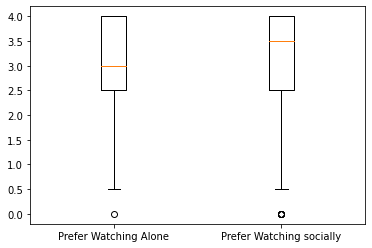

In [16]:
# like_movies_alone=orginal_data[orginal_data["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]==1]
# like_movies_socially=orginal_data[orginal_data["Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"]==0]
# alone=np.sort(like_movies_alone["The Wolf of Wall Street (2013)"].dropna())
# socially=np.sort(like_movies_socially["The Wolf of Wall Street (2013)"].dropna())
# stats.mannwhitneyu(socially,alone,alternative="greater") #9.489026953787057e-07
like_movies_alone=orginal_data[feature_1]==1
like_movies_socially=orginal_data[feature_1]==0
moive="The Wolf of Wall Street (2013)"
b=~np.isnan(orginal_data[moive])
alone=np.sort(orginal_data[like_movies_alone & b][moive])
social=np.sort(orginal_data[like_movies_socially & b][moive])
stats.mannwhitneyu(social,alone,alternative="greater")
plt.boxplot((alone, social), labels=["Prefer Watching Alone", 'Prefer Watching socially'])
np.sum(like_movies_alone) ##171
len(alone) ## 109
np.sum(like_movies_socially) # 849
len(social) ## 552
print(552/849)
print(109/171)

What proportion of movies exhibit such a “social watching” effect

In [17]:
feature_1="Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)"
like_movies_alone=orginal_data[feature_1]==1
like_movies_socially=orginal_data[feature_1]==0
p_vals=[]
for moive in orginal_data.columns[:400]:
    print(moive)
    b=~np.isnan(orginal_data[moive])
    alone=np.sort(orginal_data[like_movies_alone & b][moive])
    social=np.sort(orginal_data[like_movies_socially & b][moive])
    p_vals.append(stats.mannwhitneyu(social,alone,alternative="greater").pvalue)
    print(stats.mannwhitneyu(social,alone,alternative="greater").pvalue)


The Life of David Gale (2003)
0.11648554393434662
Wing Commander (1999)
0.057703481804381763
Django Unchained (2012)
0.11362303368894638
Alien (1979)
0.8182041202024259
Indiana Jones and the Last Crusade (1989)
0.16013477380291835
Snatch (2000)
0.8186774964007998
Rambo: First Blood Part II (1985)
0.20311254276825597
Fargo (1996)
0.5986374766488789
Let the Right One In (2008)
0.8299225234389576
Black Swan (2010)
0.7258475816225871
King Kong (1976)
0.7548060206869691
The Machinist (2004)
0.9191282555059892
A Nightmare on Elm Street (1984)
0.09063755560065034
Brazil (1985)
0.7762484578511066
The Fast and the Furious (2001)
0.057416837205936336
Change of Habit (1969)
0.0796618602668705
American Beauty (1999)
0.9660218719585314
Psycho (1960)
0.9930567993847418
Terminator 3: Rise of the Machines (2003)
0.3630446528697923
Night of the Living Dead (1968)
0.47162081765504305
Man on Fire (2004)
0.5444589168343748
Star Wars: Episode IV - A New Hope (1977)
0.6332597684914185
The Silence of the Lam

In [18]:
p_vals=np.array(p_vals)
print("about ",np.sum(p_vals<(0.005/2))/400*100 ,"% of people enjoy movies socially")

about  1.5 % of people enjoy movies socially


Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’

- Since we are being asked about the distrobution we are going to want to run teh ks test.

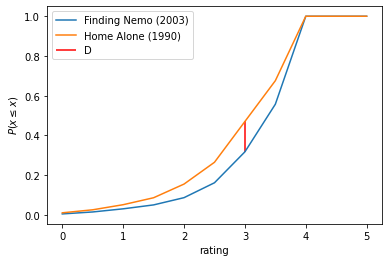

In [19]:
def ks_plot(movie_1, movie_2):
    m1=orginal_data[movie_1].dropna()
    m2=orginal_data[movie_2].dropna()
    m1_cdf=[]
    m2_cdf=[]
    x=np.arange(0,5.5,.5)
    for i in x:
        a=sum(m1<=i)/len(m1)
        b=sum(m2<=i)/len(m2)
        m1_cdf.append(a)
        m2_cdf.append(b)
    m1_cdf=np.array(m1_cdf)    
    m2_cdf=np.array(m2_cdf)
    plt.plot(x,m2_cdf, label=movie_2)
    plt.plot(x,m1_cdf,label=movie_1)
    plt.vlines(x=x[np.argmax(np.abs(m1_cdf-m2_cdf))], ymin=min(m2_cdf[np.argmax(np.abs(m1_cdf-m2_cdf))],m1_cdf[np.argmax(np.abs(m1_cdf-m2_cdf))]), ymax=max(m2_cdf[np.argmax(np.abs(m1_cdf-m2_cdf))],m1_cdf[np.argmax(np.abs(m1_cdf-m2_cdf))]), colors='r', label="D")
    plt.xlabel("rating")
    plt.ylabel("$P(x\leq x) $")
    plt.legend()
movie_1="Home Alone (1990)"
movie_2="Finding Nemo (2003)"
ks_plot(movie_1, movie_2)


In [20]:
movie_1="Home Alone (1990)"
movie_2="Finding Nemo (2003)"
m1=np.sort(orginal_data[movie_1].dropna())
m2=np.sort(orginal_data[movie_2].dropna())
stats.ks_2samp(m1,m2)

KstestResult(statistic=0.15269080020897632, pvalue=6.379381467525036e-10)

There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana
Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these
are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks
featured in this question to identify the movies that are part of each franchise]

In [21]:
franchise_list=['Star Wars','Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman' ]
series_dict={y: [x for x in orginal_data.columns if y in x] for y in franchise_list}
starting_point=series_dict["Indiana Jones"]
inconsistant=[]
alpha=0.005
print(starting_point)
for movie in range(len(starting_point)-1):
    print(starting_point[movie],starting_point[movie+1])
    a=np.sort(orginal_data[starting_point[movie]])
    b=np.sort(orginal_data[starting_point[movie+1]])
    p_val=stats.mannwhitneyu(a,b,alternative="two-sided").pvalue
    print(p_val)
    if(p_val<=alpha/2):
        inconsistant.append()

['Indiana Jones and the Last Crusade (1989)', 'Indiana Jones and the Temple of Doom (1984)', 'Indiana Jones and the Raiders of the Lost Ark (1981)', 'Indiana Jones and the Kingdom of the Crystal Skull (2008)']
Indiana Jones and the Last Crusade (1989) Indiana Jones and the Temple of Doom (1984)
6.257453033117267e-45


TypeError: append() takes exactly one argument (0 given)

In [ ]:
franchise_list=['Star Wars','Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman' ]
series_dict={y: [x for x in orginal_data.columns if y in x] for y in franchise_list}
inconsistant=[]
sw=series_dict["Star Wars"]
a=orginal_data[sw[0]].dropna()
b=orginal_data[sw[1]].dropna()
c=orginal_data[sw[2]].dropna()
d=orginal_data[sw[3]].dropna()
e=orginal_data[sw[4]].dropna()
f=orginal_data[sw[5]].dropna()
inconsistant.append(stats.kruskal(a,b,c,d,e,f).pvalue)
hp=series_dict['Harry Potter']
len(hp)# 4
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
d=orginal_data[hp[3]].dropna()
inconsistant.append(stats.kruskal(a,b,c,d).pvalue)

m=series_dict['The Matrix']
len(m)# 4
a=orginal_data[m[0]].dropna()
b=orginal_data[m[1]].dropna()
c=orginal_data[m[2]].dropna()
inconsistant.append(stats.kruskal(a,b,c).pvalue)


hp=series_dict['Indiana Jones']
(len(hp))# 4
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
d=orginal_data[hp[3]].dropna()
inconsistant.append(stats.kruskal(a,b,c,d).pvalue)

hp=series_dict['Jurassic Park']
(len(hp))# 3
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
inconsistant.append(stats.kruskal(a,b,c).pvalue)


hp=series_dict['Pirates of the Caribbean']
(len(hp))# 3
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
inconsistant.append(stats.kruskal(a,b,c).pvalue)



hp=series_dict['Toy Story']
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
inconsistant.append(stats.kruskal(a,b,c).pvalue)
hp=series_dict['Batman']
a=orginal_data[hp[0]].dropna()
b=orginal_data[hp[1]].dropna()
c=orginal_data[hp[2]].dropna()
inconsistant.append(stats.kruskal(a,b,c).pvalue)




3
3
["Pirates of the Caribbean: Dead Man's Chest (2006)", "Pirates of the Caribbean: At World's End (2007)", 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)']
['Toy Story 2 (1999)', 'Toy Story 3 (2010)', 'Toy Story (1995)']


In [ ]:
inconsistant=np.array(inconsistant)
print(np.sum(inconsistant<(alpha/2))/len(inconsistant)*100, "% of movie franchises were inconistnet ")

87.5 % of movie franchises were inconistnet 


In [ ]:
franchise_list=['Star Wars','Harry Potter', 'The Matrix', 'Indiana Jones', 'Jurassic Park', 'Pirates of the Caribbean', 'Toy Story', 'Batman' ]
series_dict={y: [x for x in orginal_data.columns if y in x] for y in franchise_list}
inconsistant=[]
alpha=0.005
for franchise in franchise_list:
    #print("current franchise is")
    print(franchise)
    for installment in range(len(series_dict[franchise])-1):
        print(series_dict[franchise][installment],series_dict[franchise][installment+1])
        a=np.sort(orginal_data[series_dict[franchise][installment]])
        b=np.sort(orginal_data[series_dict[franchise][installment+1]])
        p_val=stats.mannwhitneyu(a,b,alternative="two-sided").pvalue
        print(p_val)
        if(p_val<=alpha/2):
            inconsistant.append(franchise)
            break
    #print("-------------")
inconsistant

Star Wars
Star Wars: Episode IV - A New Hope (1977) Star Wars: Episode II - Attack of the Clones (2002)
1.805243703140495e-37
Harry Potter
Harry Potter and the Sorcerer's Stone (2001) Harry Potter and the Deathly Hallows: Part 2 (2011)
0.39596026240847026
Harry Potter and the Deathly Hallows: Part 2 (2011) Harry Potter and the Goblet of Fire (2005)
0.020257963757734556
Harry Potter and the Goblet of Fire (2005) Harry Potter and the Chamber of Secrets (2002)
0.00016641908332184398
The Matrix
The Matrix Revolutions (2003) The Matrix Reloaded (2003)
1.1419310789080132e-59
Indiana Jones
Indiana Jones and the Last Crusade (1989) Indiana Jones and the Temple of Doom (1984)
6.257453033117267e-45
Jurassic Park
The Lost World: Jurassic Park (1997) Jurassic Park III (2001)
2.7342717055178356e-22
Pirates of the Caribbean
Pirates of the Caribbean: Dead Man's Chest (2006) Pirates of the Caribbean: At World's End (2007)
0.0015465543499573278
Toy Story
Toy Story 2 (1999) Toy Story 3 (2010)
0.00120946

['Star Wars',
 'Harry Potter',
 'The Matrix',
 'Indiana Jones',
 'Jurassic Park',
 'Pirates of the Caribbean',
 'Toy Story',
 'Batman']

## extra credit 

{'whiskers': [<matplotlib.lines.Line2D at 0x25e55539fa0>,
 'caps': [<matplotlib.lines.Line2D at 0x25e55548700>,
 'boxes': [<matplotlib.lines.Line2D at 0x25e55539c10>,
 'medians': [<matplotlib.lines.Line2D at 0x25e55548e20>,
 'fliers': [<matplotlib.lines.Line2D at 0x25e555531f0>,
 'means': []}

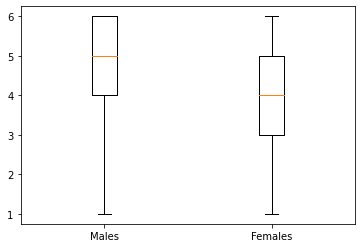

In [41]:
## are woman more scared by movies then men 
scared='The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared'
gender='Gender identity (1 = female; 2 = male; 3 = self-described)'
females=orginal_data[(orginal_data[gender]==1)]
males=orginal_data[(orginal_data[gender]==2)]
sf=females[scared].dropna()
sm=males[scared].dropna()
females_scared=np.sort(sf)
males_scared=np.sort(sm)
a=females[scared].dropna().value_counts()/len(females[scared].dropna())
stats.mannwhitneyu(females_scared,males_scared,alternative="greater")

plt.boxplot((females_scared,males_scared), labels=["Males", "Females"])




In [27]:
np.sum(~orginal_data[scared].isna())/len(orginal_data[scared])

0.9799453053783045